In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import random
import tensorflow as tf
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:
import os
import zipfile

local_zip = './drive/MyDrive/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
try:
    os.mkdir('/tmp/car_dataset')
    os.mkdir('/tmp/car_dataset/training')
    os.mkdir('/tmp/car_dataset/testing')

    os.mkdir('/tmp/car_dataset/training/iranKhodro_dena')
    os.mkdir('/tmp/car_dataset/training/kia_cerato')
    os.mkdir('/tmp/car_dataset/training/mazda_3')
    os.mkdir('/tmp/car_dataset/training/peugeot_206')
    os.mkdir('/tmp/car_dataset/training/saipa_saina')

    os.mkdir('/tmp/car_dataset/testing/iranKhodro_dena')
    os.mkdir('/tmp/car_dataset/testing/kia_cerato')
    os.mkdir('/tmp/car_dataset/testing/mazda_3')
    os.mkdir('/tmp/car_dataset/testing/peugeot_206')
    os.mkdir('/tmp/car_dataset/testing/saipa_saina')
except OSError:
    pass

In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


iranKhodro_dena_SOURCE_DIR = "/tmp/dataset/iranKhodro_dena/"
TRAINING_iranKhodro_dena_DIR = "/tmp/car_dataset/training/iranKhodro_dena/"
TESTING_iranKhodro_dena_DIR = "/tmp/car_dataset/testing/iranKhodro_dena/"

kia_cerato_SOURCE_DIR = "/tmp/dataset/kia_cerato/"
TRAINING_kia_cerato_DIR = "/tmp/car_dataset/training/kia_cerato/"
TESTING_kia_cerato_DIR = "/tmp/car_dataset/testing/kia_cerato/"

mazda_3_SOURCE_DIR = "/tmp/dataset/mazda_3/"
TRAINING_mazda_3_DIR = "/tmp/car_dataset/training/mazda_3/"
TESTING_mazda_3_DIR = "/tmp/car_dataset/testing/mazda_3/"

peugeot_206_SOURCE_DIR = "/tmp/dataset/peugeot_206/"
TRAINING_peugeot_206_DIR = "/tmp/car_dataset/training/peugeot_206/"
TESTING_peugeot_206_DIR = "/tmp/car_dataset/testing/peugeot_206/"

saipa_saina_SOURCE_DIR = "/tmp/dataset/saipa_saina/"
TRAINING_saipa_saina_DIR = "/tmp/car_dataset/training/saipa_saina/"
TESTING_saipa_saina_DIR = "/tmp/car_dataset/testing/saipa_saina/"

split_size = .9
split_data(iranKhodro_dena_SOURCE_DIR, TRAINING_iranKhodro_dena_DIR, TESTING_iranKhodro_dena_DIR, split_size)
split_data(kia_cerato_SOURCE_DIR, TRAINING_kia_cerato_DIR, TESTING_kia_cerato_DIR, split_size)
split_data(mazda_3_SOURCE_DIR, TRAINING_mazda_3_DIR, TESTING_mazda_3_DIR, split_size)
split_data(peugeot_206_SOURCE_DIR, TRAINING_peugeot_206_DIR, TESTING_peugeot_206_DIR, split_size)
split_data(saipa_saina_SOURCE_DIR, TRAINING_saipa_saina_DIR, TESTING_saipa_saina_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

In [6]:
TRAINING_DIR = "/tmp/car_dataset/training/"

train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest'
      )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/car_dataset/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=10,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 2102 images belonging to 5 classes.
Found 980 images belonging to 5 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
from tensorflow.keras.applications import MobileNet

base_model=MobileNet(weights='imagenet',include_top=False)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
preds=Dense(5,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=preds)
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()
# steps_per_epoch=int(traindata.samples/Batch_size)
# hist = model.fit(train_generator, validation_data=validation_generator, epochs=10, steps_per_epoch=40)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0     

In [10]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', patience=20, mode='max', restore_best_weights=True)

hist=model.fit(train_generator,
          epochs=150,
          steps_per_epoch=14,
          validation_data=validation_generator,
          validation_steps=1,
          callbacks=[early_stop])

Epoch 1/150
14/14 [==============================] - 6s 171ms/step - loss: 1.7818 - accuracy: 0.2571 - val_loss: 2.5506 - val_accuracy: 0.1000
Epoch 2/150
14/14 [==============================] - 2s 139ms/step - loss: 1.5939 - accuracy: 0.3429 - val_loss: 1.7779 - val_accuracy: 0.5000
Epoch 3/150
14/14 [==============================] - 2s 139ms/step - loss: 1.6998 - accuracy: 0.3357 - val_loss: 1.2884 - val_accuracy: 0.6000
Epoch 4/150
14/14 [==============================] - 2s 134ms/step - loss: 1.3230 - accuracy: 0.4786 - val_loss: 2.9705 - val_accuracy: 0.2000
Epoch 5/150
14/14 [==============================] - 2s 137ms/step - loss: 1.2293 - accuracy: 0.4929 - val_loss: 1.3049 - val_accuracy: 0.5000
Epoch 6/150
14/14 [==============================] - 2s 134ms/step - loss: 1.2068 - accuracy: 0.5571 - val_loss: 1.6386 - val_accuracy: 0.2000
Epoch 7/150
14/14 [==============================] - 2s 142ms/step - loss: 1.0397 - accuracy: 0.6286 - val_loss: 0.9643 - val_accuracy: 0.7000

<Figure size 432x288 with 0 Axes>

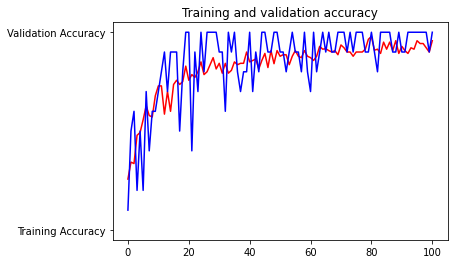

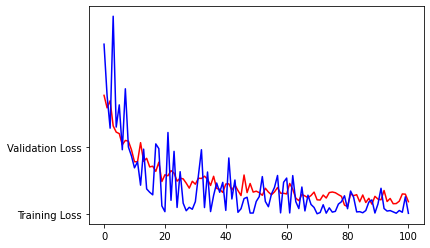

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [13]:
model.save('./drive/MyDrive/SecondWay_TL_model', save_format='h5')

In [14]:
# install and import tensorflow optimization toolkit
!pip install tensorflow_model_optimization
import tensorflow_model_optimization as tfmot

In [15]:
# training with pruning
import numpy as np 



# define pruning metric
prune_low_magnitude=tfmot.sparsity.keras.prune_low_magnitude

# define end step 
num_epoch=10
batch_size=10
# num_data=train_generator.shape[0]*(1-validation_generator)
# end_step=np.ceil(num_data/batch_size).astype(np.int32)*num_epoch
opt = SGD(learning_rate=0.01, momentum=0.9)

# define pruning schedule
pruning_params={
    'pruning_schedule':tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.5,final_sparsity=0.85,begin_step=0,end_step=180,power=3,frequency=100)
    }

callbacks=[tfmot.sparsity.keras.UpdatePruningStep()]
model_prune=prune_low_magnitude(model,**pruning_params)
model_prune.compile(optimizer=opt ,loss=tf.keras.losses.categorical_crossentropy ,metrics=['accuracy'])
hist_prune=model_prune.fit(train_generator,batch_size=batch_size,epochs=num_epoch,validation_data=validation_generator,validation_steps=1,callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/10
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
211/211 [==============================] - 53s 158ms/step - loss: 1.4318 - accuracy: 0.4248 - val_loss: 2.1588 - val_accuracy: 0.2000
Epoch 2/10
211/211 [==============================] - 32s 152ms/step - loss: 0.9892 - accuracy: 0.6089 - val_loss: 1.0061 - val_accuracy: 0.6000
Epoch 3/10
211/211 [==============================] - 33s 155ms/step - loss: 0.7532 - accuracy: 0.7212 - val_loss: 0.4347 - val_accuracy: 0.9000
Epoch 4/10
211/211 [==============================] - 33s 155ms/step - loss: 0.6417 - accuracy: 0.7664 - val_loss: 0.3444 - val_accuracy: 0.9000
Epoch 5/10
211/211 [==============================] - 33s 154ms/step - loss: 0.5952 - accuracy: 0.7759 - val_loss: 1.0114 - val_accuracy: 0.4000
Epoch 6/10
211/211 [==============================] - 32s 152ms/step - loss: 0.4847 - accuracy: 0.8302 - val_loss: 0.5306 - val_accuracy:

In [17]:
# # training with prune 
# import tensorflow_model_optimization as tfmot
# import numpy as np


# # define pruning metric
# prune_low_magnitude=tfmot.sparsity.keras.prune_low_magnitude

# # define end step
# validation_split=.1
# batch_size=256
# epochs=2
# num_data=train_data.shape[0]*(1-validation_split)
# end_step=np.ceil(num_data/batch_size).astype(np.int32)*epochs


# # define pruning schedule 
# pruning_params={
#     'pruning_schedule':tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.5,final_sparsity=.85,begin_step=0,end_step=end_step,power=3,frequency=100)
# }

# # set pruning step update callbacks
# callbacks=[tfmot.sparsity.keras.UpdatePruningStep()]
# model_pruning=prune_low_magnitude(model,**pruning_params)
# model_pruning.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
# history_=model_pruning.fit(train_data,train_label,batch_size=batch_size,epochs=epochs,validation_split=validation_split,callbacks=callbacks)




In [20]:
# save baseline and prune model
# model.save('baseline.h5')
model_prune.save('./drive/MyDrive/SecondWay_TL_model_prune', save_format='h5')